California
LasVegas
PhoenixTucson
BuffaloRochester
Spokane
LosAngeles
Philadelphia
Boston
StLouis
Louisville
Orlando
Southeast
Boise
MiamiFtLauderdale
NorthernNewEngland
BaltimoreWashington
Midsouth
Tampa
West
Northeast
Atlanta
Nashville
TotalUS
Syracuse
WestTexNewMexico
Jacksonville
Charlotte
Sacramento
GrandRapids
Roanoke
Denver
SanDiego
GreatLakes
RichmondNorfolk
DallasFtWorth
SanFrancisco
HarrisburgScranton
Pittsburgh
RaleighGreensboro
Seattle
HartfordSpringfield
Portland
CincinnatiDayton
SouthCarolina
Houston
Chicago
Plains
Indianapolis
SouthCentral
Columbus
Albany
Detroit
NewOrleansMobile
NewYork


<AxesSubplot:xlabel='Date'>

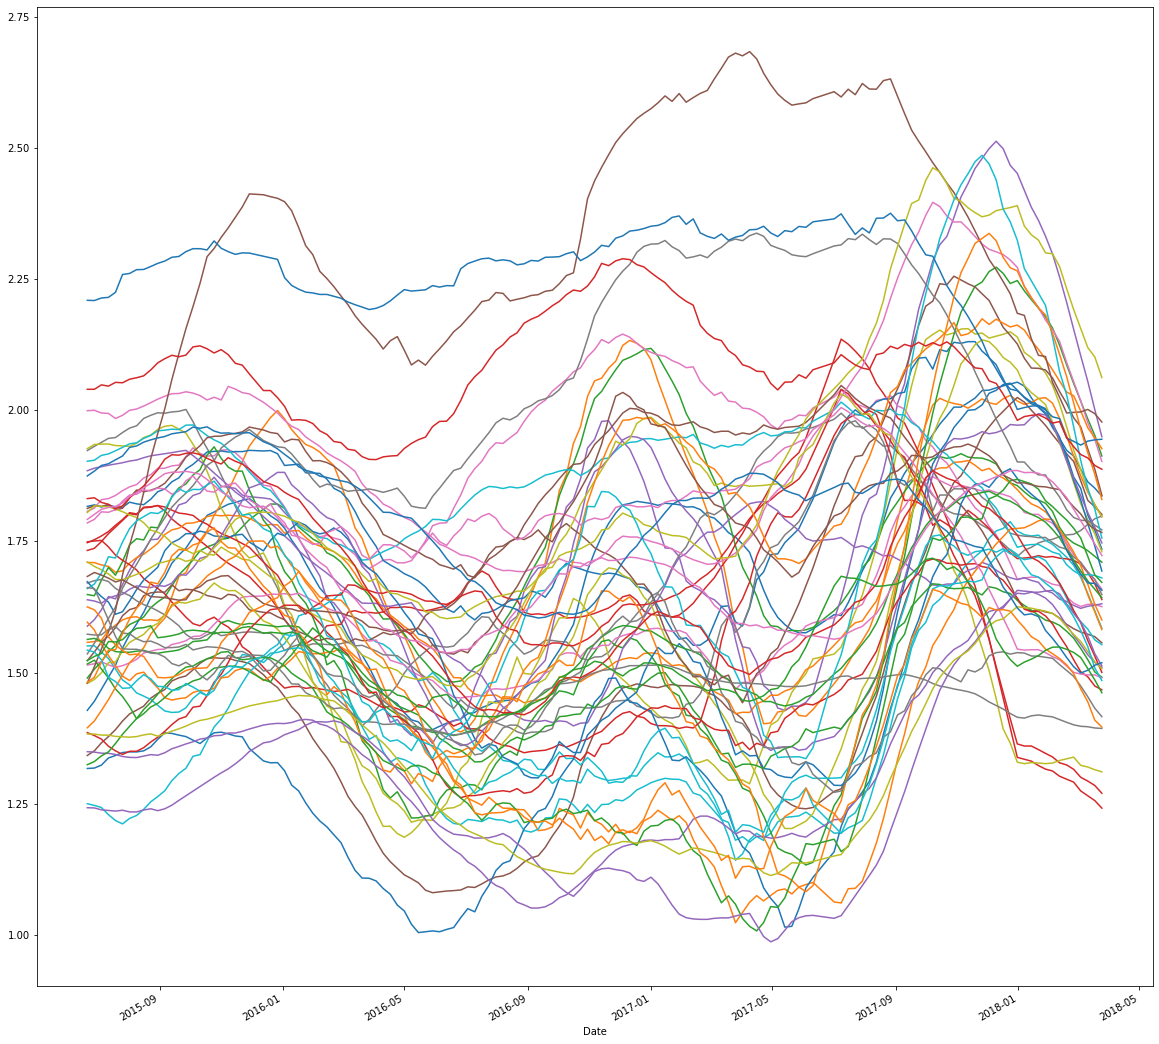

In [1]:
import pandas as pd 

df = pd.read_csv("datasets/avocado.csv")
# Reads .csv file using pandas



df = df.copy()[df['type']=="organic"]
# Creates a new DataFrame of only type organic - helps with join process at the bottom
df["Date"] = pd.to_datetime(df["Date"])
# CSV files don't conserve date format, so pandas can convert to date-time
df.sort_values(by="Date", ascending=True, inplace=True)
# Sort by date

graph_df = pd.DataFrame()
# new DataFrame
for region in df['region'].unique():
    # iterates over region 
    print(region)
    # print all regions to be sure they are all there
    region_df = df.copy()[df['region']==region]
    # new regional database of each region
    region_df.set_index("Date", inplace=True)
    # sets index by date 
    region_df.sort_index(inplace=True)
    # sorts index by date 
    region_df[f'{region}_price25ma'] = region_df['AveragePrice'].rolling(25).mean()
    # regional rolling av. mean with new name as [region]_price25ma
    
    if graph_df.empty: 
        graph_df = region_df[[f'{region}_price25ma']]
        # first region graphed
        
    else: 
        graph_df = graph_df.join(region_df[f'{region}_price25ma'])
        # joins the other regions onto the graph
        
graph_df.tail()
graph_df.dropna().plot(figsize=(20,20), legend=False)
# plots graph within pandas without a legend